<h1>Linear Algebra in Python </h1>

<h2>some useful functions to draw and represent </h2>

In [1]:
# Just for reference, this prints the currently version of Python

import sys

print(sys.version)
# Code for pretty-printing math notation
from IPython.display import display, Math, Latex, Markdown

def display_math(str_latex):
    display(Markdown('${}$'.format(str_latex)))
    
# Demo:
display_math(r'x \in \mathcal{S} \implies y \in \mathcal{T}')

3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0]


$x \in \mathcal{S} \implies y \in \mathcal{T}$

In [2]:
# Code for drawing diagrams involving vectors
import matplotlib.pyplot as plt
%matplotlib inline

DEF_FIGLEN = 4
DEF_FIGSIZE = (DEF_FIGLEN, DEF_FIGLEN)

def figure(figsize=DEF_FIGSIZE):   
    '''return a f i g u re obj'''
    return plt.figure(figsize=figsize)

def multiplot_figsize(plot_dims, base_figsize=DEF_FIGSIZE):
    
    return tuple([p*x for p, x in zip(plot_dims, base_figsize)])

def subplots(plot_dims, base_figsize=DEF_FIGSIZE, sharex='col', sharey='row', **kw_args):
    assert len(plot_dims) == 2, "Must define a 2-D plot grid."
    multiplot_size = multiplot_figsize(plot_dims, base_figsize)
    _, axes = plt.subplots(plot_dims[0], plot_dims[1],
                           figsize=multiplot_size[::-1],
                           sharex=sharex, sharey=sharey,
                           **kw_args)
    return axes

def new_blank_plot(ax=None, xlim=(-5, 5), ylim=(-5, 5), axis_color='gray', title=''):
    if ax is None:
        ax = plt.gca()
    else:
        plt.sca(ax)
    ax.axis('equal')
    if xlim is not None: ax.set_xlim(xlim[0], xlim[1])
    if ylim is not None: ax.set_ylim(ylim[0], ylim[1])
    if axis_color is not None:
        ax.axhline(color=axis_color)
        ax.axvline(color=axis_color)
    if title is not None:
        ax.set_title(title)
    return ax

def draw_point2d(p, ax=None, marker='o', markersize=5, **kw_args):
    assert len(p) == 2, "Point must be 2-D."
    if ax is None: ax = plt.gca()
    ax.plot(p[0], p[1], marker=marker, markersize=markersize,
            **kw_args);

def draw_label2d(p, label, coords=False, ax=None, fontsize=14,
                 dp=(0.0, 0.1), horizontalalignment='center', verticalalignment='bottom',
                 **kw_args):              # **kwargs = dictionary -named args of function
    assert len(p) == 2, "Position must be 2-D."
    if ax is None: ax = plt.gca()
    text = '{}'.format(label)
    if coords:
        text += ' = ({}, {})'.format(p[0], p[1])
    ax.text(p[0]+dp[0], p[1]+dp[1], text,
            fontsize=fontsize,
            horizontalalignment=horizontalalignment,
            verticalalignment=verticalalignment,
            **kw_args)

def draw_line2d(start, end, ax=None, width=1.0, color='black', alpha=1.0, **kw_args):
    assert len(start) == 2, "`start` must be a 2-D point."
    assert len(end) == 2, "`end` must be a 2-D point."
    if ax is None:
        ax = plt.gca()
    x = [start[0], end[0]]
    y = [start[1], end[1]]
    ax.plot(x, y, linewidth=width, color=color, alpha=alpha, **kw_args);

def draw_vector2d(v, ax=None, origin=(0, 0), width=0.15, color='black', alpha=1.0,
                  **kw_args):
    assert len(v) == 2, "Input vector must be two-dimensional."
    if ax is None:
        ax = plt.gca()
    ax.arrow(origin[0], origin[1], v[0], v[1],
             width=width,
             facecolor=color,
             edgecolor='white',
             alpha=alpha,
             length_includes_head=True,
             **kw_args);
    
def draw_vector2d_components(v, y_offset_sign=1, vis_offset=0.05, comp_width=1.5, **kw_args):
    assert len(v) == 2, "Vector `v` must be 2-D."
    y_offset = y_offset_sign * vis_offset
    draw_line2d((0, y_offset), (v[0], y_offset), width=comp_width, **kw_args)
    draw_line2d((v[0], y_offset), v, width=comp_width, **kw_args)
    
def draw_angle(theta_start, theta_end, radius=1, center=(0, 0), ax=None, **kw_args):
    from matplotlib.patches import Arc
    if ax is None: ax = plt.gca()
    arc = Arc(center, center[0]+2*radius, center[1]+2*radius,
              theta1=theta_start, theta2=theta_end,
              **kw_args)
    ax.add_patch(arc)
            
def draw_angle_label(theta_start, theta_end, label=None, radius=1, center=(0, 0), ax=None, **kw_args):
    from math import cos, sin, pi
    if ax is None: ax = plt.gca()
    if label is not None:
        theta_label = (theta_start + theta_end) / 2 / 360 * 2.0 * pi
        p = (center[0] + radius*cos(theta_label),
             center[1] + radius*sin(theta_label))
        ax.text(p[0], p[1], label, **kw_args)

print("Ready!")

Ready!


In [3]:
def vector(*elems, dim=None):
    """
    Exercise: What does this function do?
    """
    if dim is not None:
        if len(elems) > 0:
            assert dim == len(elems), "Number of supplied elements differs from the requested dimension."
        else: # No supplied elements
            elems = [0.0] * dim
    return tuple(elems)

def dim(v):
    """Returns the dimensionality of the vector `v`"""
    return len(v)

v = vector(1.0, 2.0)
d = dim(v)
print('v = {}    <==  {}-dimensional'.format(v, d))

def latex_vector(v, transpose=False):
    """Returns a LaTeX string representation of a vector"""
    s = r'''\left[ \begin{matrix} '''
    sep = r'''\\''' if not transpose else r''', &'''
    s += (r' {} ').format(sep).join([str(vi) for vi in v])
    s += r''' \end{matrix}\right]'''
    return s

# Demo: Pretty-print `v` from before
print("Standard Python output:", v)
print("\n'Mathy' output:")
v_latex = latex_vector(v)
display_math('v \equiv ' + v_latex)
def latex_vector(v, transpose=False):
    """Returns a LaTeX string representation of a vector"""
    s = r'''\left[ \begin{matrix} '''
    sep = r'''\\''' if not transpose else r''', &'''
    s += (r' {} ').format(sep).join([str(vi) for vi in v])
    s += r''' \end{matrix}\right]'''
    return s

# Demo: Pretty-print `v` from before
print("Standard Python output:", v)
print("\n'Mathy' output:")
v_latex = latex_vector(v)
display_math('v \equiv ' + v_latex)

v = (1.0, 2.0)    <==  2-dimensional
Standard Python output: (1.0, 2.0)

'Mathy' output:


$v \equiv \left[ \begin{matrix} 1.0 \\ 2.0 \end{matrix}\right]$

Standard Python output: (1.0, 2.0)

'Mathy' output:


$v \equiv \left[ \begin{matrix} 1.0 \\ 2.0 \end{matrix}\right]$

<h4>Represent vector in Latex </h4>

In [4]:
#represent a vector (2, -1.5)
v2 =(2,-1.5)
#latex_vector(vector((v2)))
display_math('v2 \equiv '+latex_vector(v2))

$v2 \equiv \left[ \begin{matrix} 2 \\ -1.5 \end{matrix}\right]$

<h4>Plot points </h4>

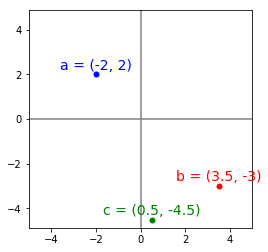

In [5]:
# Define three points
a = (-2, 2)
b = (3.5, -3)
c = (0.5, -4.5)

# Draw a figure containing these points
figure()
new_blank_plot()
draw_point2d(a, color='blue'); draw_label2d(a, 'a', color='blue', coords=True)
draw_point2d(b, color='red'); draw_label2d(b, 'b', color='red', coords=True)
draw_point2d(c, color='green'); draw_label2d(c, 'c', color='green', coords=True)

<h2> Vectors </h3>

In [1]:
#compute the Length of a vector  by euclidean distance
def length(v):
    from math import sqrt
    return sqrt(sum([vi*vi for vi in v]))

print("The length of v = {} is about {}.".format(v, length(v)))

NameError: name 'v' is not defined

In [7]:
length (c)
d = (12,-5)
length((d))

13.0

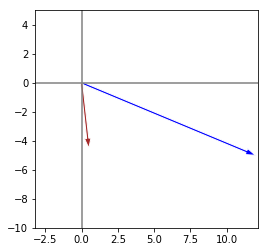

In [8]:
#drawing vectors c and d
figure()
new_blank_plot(xlim=(-5,14), ylim=(-10,5)) #args xlim, ylim set according to vectors
draw_vector2d(d, color='blue')
draw_vector2d(c, color='brown')

<h4> p norm </h4>

In [9]:
# a pnorm function
import math
def norm(v, p=2):
    assert p >0
    from math import sqrt, inf, pow
    if p==1: return sum ([abs(vi) for vi in v])
    if p == 2: return sqrt(sum([vi*vi for vi in v]))
    if p == inf : return max([abs(vi) for vi in v])
    return pow(sum([pow(abs(vi), p) for vi in v]), 1.0/p)

print(norm(d,1))
print(norm(d,2))
print(norm(d , math.inf))


17
13.0
12


In [58]:
2**(-2)

0.25

<h3> Vector Basic Operations </h3>

<h4>Scaling </h4>

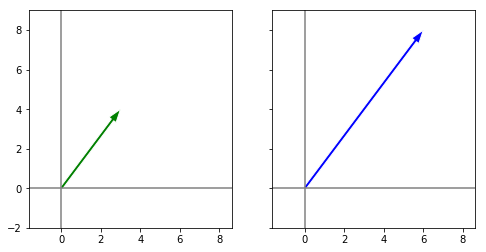

In [72]:
def scale(v, sigma):
    return tuple([sigma * vi for vi in v])

e = vector(3.0,4.0)
sigma=2.0
e2= scale(e, sigma)

axes= subplots((1,2))
new_blank_plot(axes[0],xlim=(-2,9), ylim=(-2,9))
draw_vector2d(e, color="green")

new_blank_plot(axes[1],xlim=(-2,9), ylim=(-2,9))
draw_vector2d(e2, color="blue")

<h4> addition </h4>

In [86]:
def add(v,w):
    assert len(v) == len(w), "Vectors must have the same length."
    return tuple ([vi + wi for vi, wi in zip(v,w)])

ae = add(a,e)
print(ae)

(1.0, 6.0)


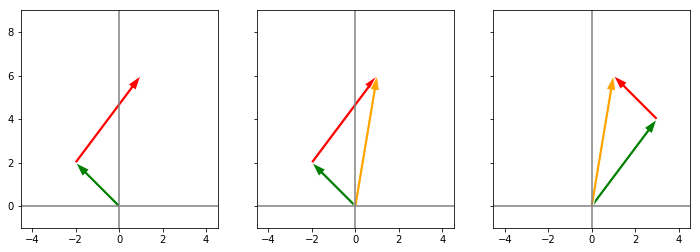

In [102]:
axes= subplots((1,3))
new_blank_plot(ax=axes[0],ylim=(-1,9))
draw_vector2d(a, color ='green')
draw_vector2d(e, color ='red', origin=a)

new_blank_plot(ax=axes[1],ylim=(-1,9))
draw_vector2d(a, color ='green')
draw_vector2d(e, color ='red',origin=a)
draw_vector2d(ae,  color ="orange")

new_blank_plot(ax=axes[2],ylim=(-1,9))
draw_vector2d(e, color ='green')
draw_vector2d(a, color ='red',origin=e)
draw_vector2d(ae,  color ="orange")



<h2> Vectors without numpy </h2>

In [3]:
height_wight_age= [ 70,70,40]


In [6]:
def vector_add(v,w):
    return [v_i + w_i for v_i, w_i in zip(v,w)]

In [19]:
V1 = [2,20,30]
V2=[ 4, 24, 34]
V3 = [6,26,36]
vector_add(V1,V2)

[6, 44, 64]

In [13]:
def vector_substract(v,w):
    return [v_i - w_i for v_i, w_i in zip(v,w)]

In [14]:
vector_substract(V2,V1)

[2, 4, 4]

<h5> vector sum </h5>
<p>reduce() stores the intermediate result and only returns the final summation value.

In [27]:
from functools import reduce
def vector_sum(vectors):
    return reduce(vector_add, vectors)

In [28]:
vector_sum([V1,V2,V3])

[12, 70, 100]